In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

In [3]:
data = pd.read_csv('Sunspots.csv')
df = data.tail(60)
df.rename(columns={'Monthly Mean Total Sunspot Number': 'data'}, inplace=True)
df

,Unnamed: 0,Date,data
3192,3192,2015-01-31,93.0
3193,3193,2015-02-28,66.7
3194,3194,2015-03-31,54.5
3195,3195,2015-04-30,75.3
3196,3196,2015-05-31,88.8
3197,3197,2015-06-30,66.5
3198,3198,2015-07-31,65.8
3199,3199,2015-08-31,64.4
3200,3200,2015-09-30,78.6
3201,3201,2015-10-31,63.6


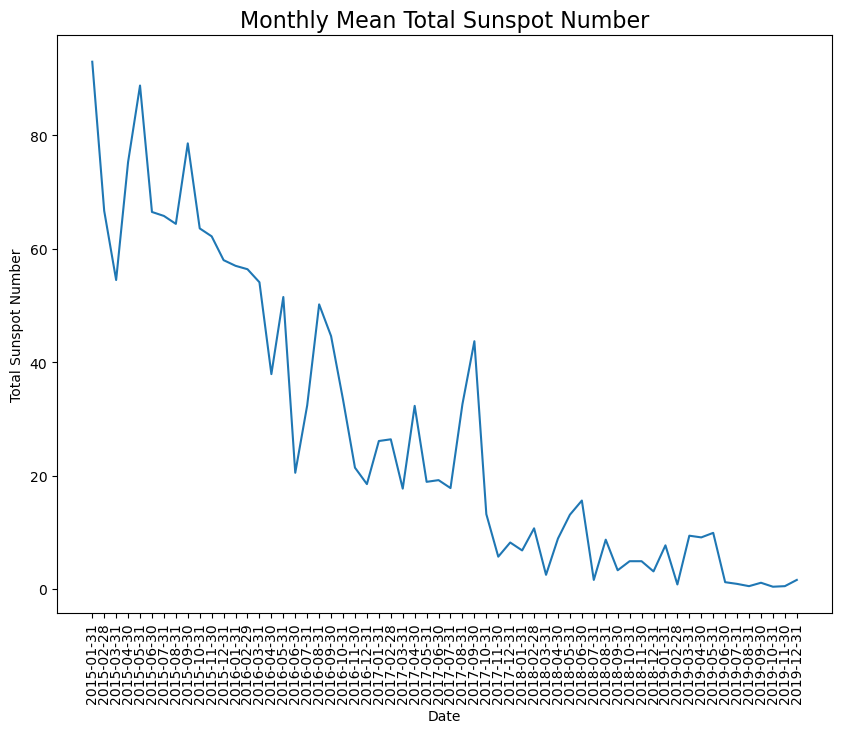

In [4]:
plt.plot(df['Date'], df['data'])
plt.title('Monthly Mean Total Sunspot Number', size = 16)
plt.ylabel('Total Sunspot Number')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

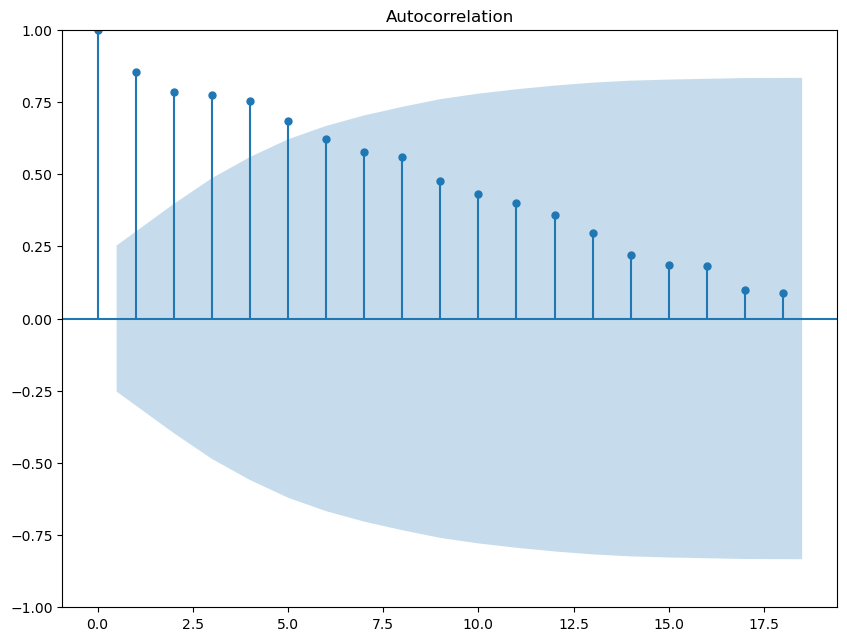

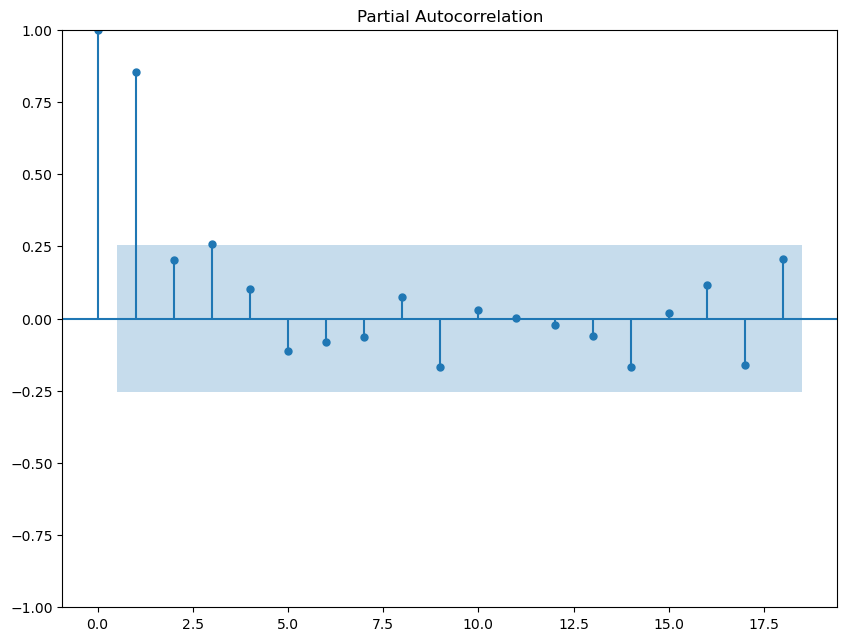

In [5]:
plot_acf(df['data']);
plot_pacf(df['data']);

**Observations:**

>The **acf** shows a ***non-stationary*** characteristic.

>The **pacf** also seems to show a ***non-stationary*** characteristic.

In [6]:
ad_fuller_result = adfuller(df['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.1441823564427955
p-value: 0.2271235726729114


>The **ad-fuller score is high**, ***differencing is required*** to make the data stationary.

# Differencing

In [7]:
data['data_tr_1'] = np.log(df['data'])
data['data_tr_1'] = data['data_tr_1'].diff()
data = data.tail(60)
data.rename(columns={'Monthly Mean Total Sunspot Number': 'data'}, inplace=True)
data

,Unnamed: 0,Date,data,data_tr_1
3192,3192,2015-01-31,93.0,NaN
3193,3193,2015-02-28,66.7,-0.332395
3194,3194,2015-03-31,54.5,-0.202004
3195,3195,2015-04-30,75.3,0.323279
3196,3196,2015-05-31,88.8,0.164907
3197,3197,2015-06-30,66.5,-0.289185
3198,3198,2015-07-31,65.8,-0.010582
3199,3199,2015-08-31,64.4,-0.021506
3200,3200,2015-09-30,78.6,0.199258
3201,3201,2015-10-31,63.6,-0.211758


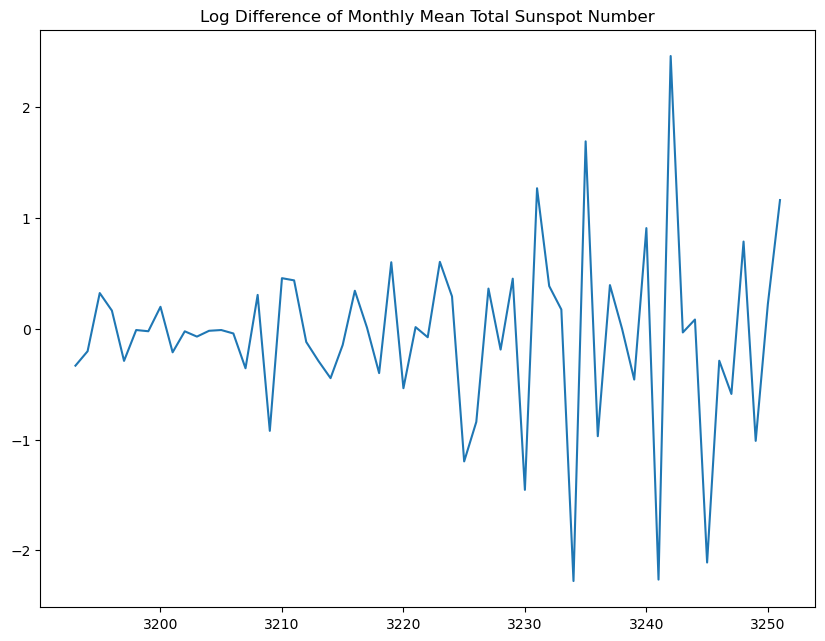

In [8]:
plt.plot(data['data_tr_1'])
plt.title("Log Difference of Monthly Mean Total Sunspot Number")
plt.show()

In [9]:
ad_fuller_result = adfuller(data['data_tr_1'][1:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.301671255924241
p-value: 0.00044126145810803645


>Nailed it! Stationarity check **passed (p < 0.05)**, ***time to model on!***

# Finding optimal ARIMA Model

In [10]:
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        endog - the observed variable
    """
    
    #list that will contain the results of every ARIMA model (p,d,q)
    results = []
    
    #tqdm is a timer and progress bar (for any programmer's sanity)
    #this loop will create the 
    for order in tqdm_notebook(order_list):
        
        # will create a model based on provided `order_list`
        try: 
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        
        #will just continue if it encounters an error (a try clause is always paired with except)
        except:
            continue
        
        #calculates the aic value of the model
        aic = model.aic
        
        #appends a list containing the order with its respective aic value
        results.append([order, aic])
    
    #converts the `results` list into a dataframe
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    #returns the summary df containing all the salient information
    return result_df

In [11]:
#p values to test
ps = range(0, 11, 1)

#constant differencing value d
d = 1

#q values to test
qs = range(0, 11, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs) #the product function will create all possible combinations of p and q to evaluate
parameters_list = list(parameters)

#save the combinations in an empty list
order_list = []

#create a tuple for each possible combinationn and insert the constant differencing value d = 1
for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)

#display the first ten values in the order list
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9)]

In [12]:
len(order_list)

121

In [13]:
data['data']

3192    93.0
3193    66.7
3194    54.5
3195    75.3
3196    88.8
3197    66.5
3198    65.8
3199    64.4
3200    78.6
3201    63.6
3202    62.2
3203    58.0
3204    57.0
3205    56.4
3206    54.1
3207    37.9
3208    51.5
3209    20.5
3210    32.4
3211    50.2
3212    44.6
3213    33.4
3214    21.4
3215    18.5
3216    26.1
3217    26.4
3218    17.7
3219    32.3
3220    18.9
3221    19.2
3222    17.8
3223    32.6
3224    43.7
3225    13.2
3226     5.7
3227     8.2
3228     6.8
3229    10.7
3230     2.5
3231     8.9
3232    13.1
3233    15.6
3234     1.6
3235     8.7
3236     3.3
3237     4.9
3238     4.9
3239     3.1
3240     7.7
3241     0.8
3242     9.4
3243     9.1
3244     9.9
3245     1.2
3246     0.9
3247     0.5
3248     1.1
3249     0.4
3250     0.5
3251     1.6
Name: data, dtype: float64

In [14]:
result_df = optimize_ARIMA(data['data'], order_list)
result_df

  0%|          | 0/121 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(3, 1, 4)",435.111958
1,"(2, 1, 3)",437.383650
2,"(4, 1, 4)",438.026685
3,"(5, 1, 6)",438.216921
4,"(3, 1, 5)",438.425940
...,...,...
116,"(2, 1, 1)",455.172991
117,"(1, 1, 7)",463.792455
118,"(0, 1, 10)",464.359409
119,"(0, 1, 7)",465.418236


In [15]:
best_model = SARIMAX(data['data'], order=(3,1,4), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   60
Model:               SARIMAX(3, 1, 4)   Log Likelihood                -209.556
Date:                Wed, 06 Dec 2023   AIC                            435.112
Time:                        21:34:52   BIC                            451.732
Sample:                             0   HQIC                           441.600
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9756      0.103      9.450      0.000       0.773       1.178
ar.L2         -0.9558      0.093    -10.245      0.000      -1.139      -0.773
ar.L3          0.9175      0.076     12.021      0.0

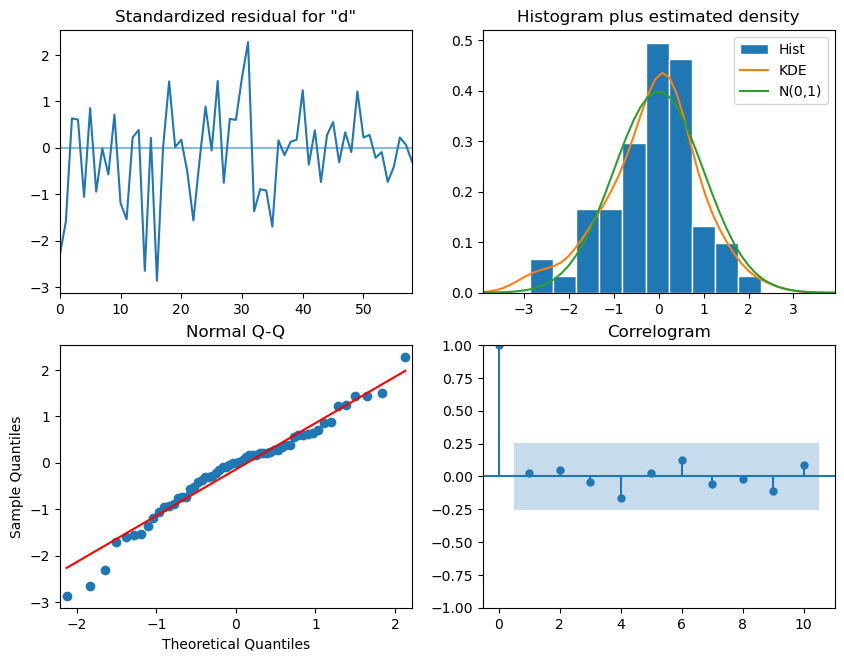

In [16]:
res.plot_diagnostics();

**Observations:**

>Standardized residual for "d". The residuals appear to be ***mean-centered residuals***, with most values falling between -2 and 2.

>Histogram plus estimated density. Most points clustered in the middle shows ***normal distribution***.

>Normal Q-Q. Shows data points are ***close to the best fitting line***

>Correlogram. Shows ***stationarity***

# Predictions

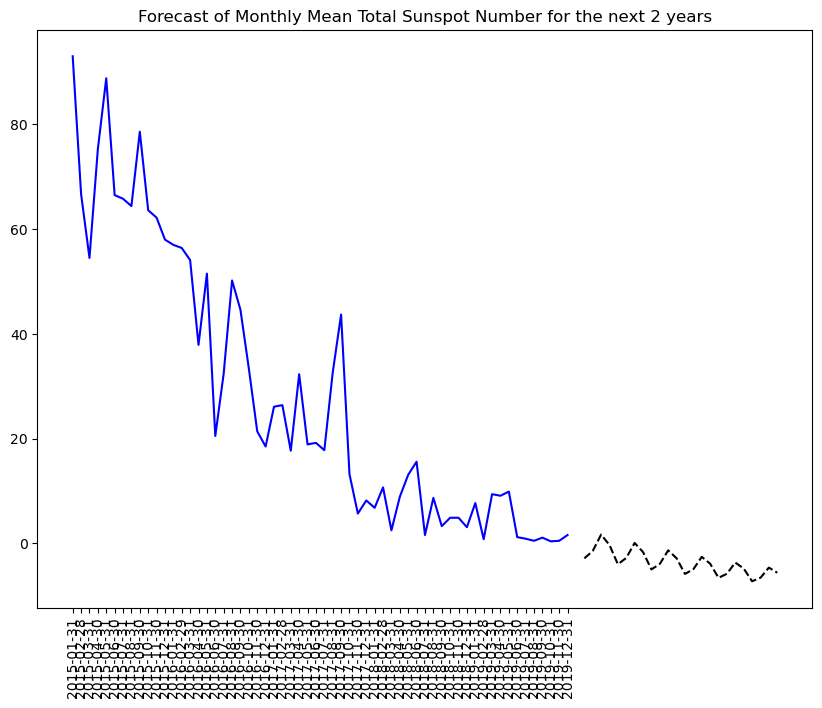

In [17]:
n_forecast = 24 #Lets say we want to forecast 2 years of data (24 months) in the future
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

#visualize the predictions with respect ot historical data (use different markers)
fig, ax = plt.subplots()
ax.plot(data['Date'], data['data'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')

ax.set(title='Forecast of Monthly Mean Total Sunspot Number for the next 2 years')
plt.xticks(rotation=90)
plt.show()

In [18]:
data['model'] = predict.predicted_mean
data

,Unnamed: 0,Date,data,data_tr_1,model
3192,3192,2015-01-31,93.0,NaN,0.000000
3193,3193,2015-02-28,66.7,-0.332395,92.997500
3194,3194,2015-03-31,54.5,-0.202004,72.149957
3195,3195,2015-04-30,75.3,0.323279,68.836653
3196,3196,2015-05-31,88.8,0.164907,83.208286
3197,3197,2015-06-30,66.5,-0.289185,76.197394
3198,3198,2015-07-31,65.8,-0.010582,58.050082
3199,3199,2015-08-31,64.4,-0.021506,72.908951
3200,3200,2015-09-30,78.6,0.199258,78.716432
3201,3201,2015-10-31,63.6,-0.211758,68.621553


In [19]:
from math import sqrt

mse = mean_squared_error(data['data'], data['model'])
print(f'MSE: {mse}')
rmse = sqrt(mean_squared_error(data['data'], data['model']))
print(f'RMSE: {rmse}')

MSE: 220.91980422866274
RMSE: 14.863371226900805
